In [83]:
from keras.datasets import imdb

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

import numpy as np

def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results
x_train = vectorize_sequence(x_train)
x_test = vectorize_sequence(x_test)

y_train  = np.asarray(y_train).astype('float32')

y_test = np.asarray(y_test).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

x_val = x_train[:10000]
px_train = x_train[10000:]
y_val = y_train[:10000]
py_train = y_train[10000:]

history = model.fit(px_train,py_train,batch_size=512,epochs=10,
                    validation_data=(x_val,y_val))

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epoches = range(1,len(acc) + 1)

plt.plot(epoches,loss_values,'bo',label='Training loss')

plt.plot(epoches,val_loss_values,'b',label='Validation loss')

plt.title('Train and validation loss')

plt.xlabel('Epoches')

plt.ylabel('Loss')

plt.legend()

plt.show()

plt.plot(epoches,acc,'bo',label='Training accuracy')

plt.plot(epoches,val_acc,'b',label='Validation accuracy')

plt.title('Train and validation accuracy')

plt.xlabel('Epoches')

plt.ylabel('Accuracy')

plt.legend()

plt.show()



In [96]:
from keras.datasets import reuters

(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])

decoded_newswire

import numpy as np

def vectorize_sequences(sequences,dimensions=10000):
    results = np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
px_train = x_train[1000:]
y_val = y_train[:1000]
py_train = y_train[1000:]

history = model.fit(px_train,py_train,epochs=20,batch_size=512,
                    validation_data=(x_val,y_val))

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoches = range(1,len(acc)+1)
plt.plot(epoches,loss,'bo',label='loss')
plt.plot(epoches,val_loss,'b',label='val_loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(epoches,acc,'bo',label='acc')
plt.plot(epoches,val_acc,'b',label='val_acc')
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

import copy

y_test_copy = copy.copy(np.argmax(y_test,axis=1))

y_test_copy.shape

np.random.shuffle(y_test_copy)

hits_array = np.array(y_test_copy) == np.array(np.argmax(y_test,axis=1))

float(np.sum(hits_array)) / len(y_test)

In [2]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

train_data.shape

test_data.shape

train_targets

mean = train_data.mean(axis=0)

train_data -= mean

std = train_data.std(axis=0)

train_data /=  std

test_data -= mean
test_data /= mean

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

import numpy as np

k = 4
num_val_samples = len(train_data) // k

num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
    val_tragets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data,val_tragets),
                         epochs=num_epochs,batch_size=1,verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

import matplotlib.pyplot as plt

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

Using TensorFlow backend.


In [39]:
import os,shutil

original_dataset_dir = r'G:\pic_data\dogs_vs_cats\all\train\train'

base_dir = r'G:\pic_data\dogs_vs_cats\small'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')

os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [40]:
from keras import layers
from keras import models

In [41]:
model = models.Sequential()

In [42]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [44]:
from keras import optimizers

In [45]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [46]:
from keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 486ms/step - loss: 0.6884 - acc: 0.5365 - val_loss: 0.6648 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 35s 352ms/step - loss: 0.6618 - acc: 0.6115 - val_loss: 0.6423 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 35s 346ms/step - loss: 0.6173 - acc: 0.6710 - val_loss: 0.6015 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 35s 346ms/step - loss: 0.5613 - acc: 0.7050 - val_loss: 0.5813 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 35s 347ms/step - loss: 0.5383 - acc: 0.7265 - val_loss: 0.5814 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 36s 356ms/step - loss: 0.5062 - acc: 0.7475 - val_loss: 0.5639 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 35s 346ms/step - loss: 0.4768 - acc: 0.7690 - val_loss: 0.5757 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 3

In [49]:
model.save('cats_and_dogs_small_1.h5')

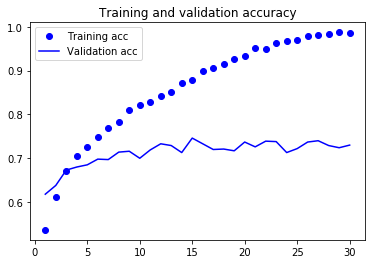

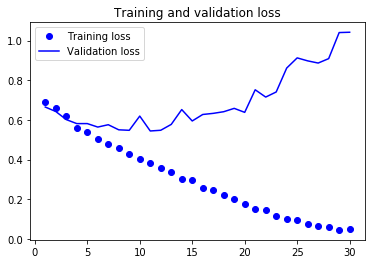

In [50]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

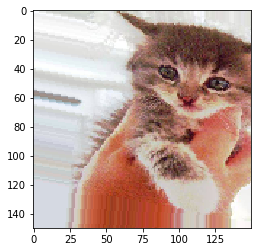

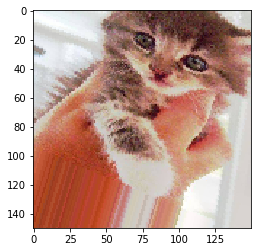

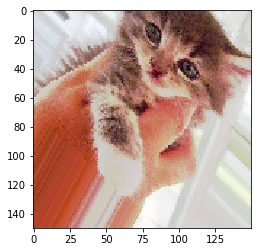

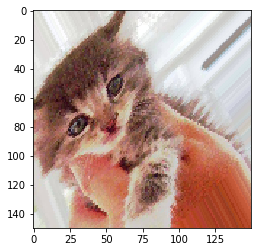

In [52]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()        

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [54]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - ETA: 19s - loss: 0.3971 - acc: 0.8189 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00

In [55]:
model.save('cats_and_dogs_small_2.h5')

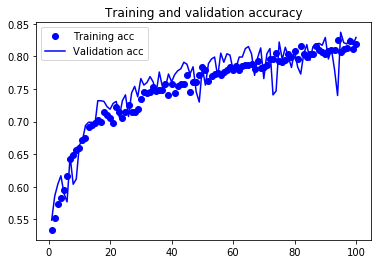

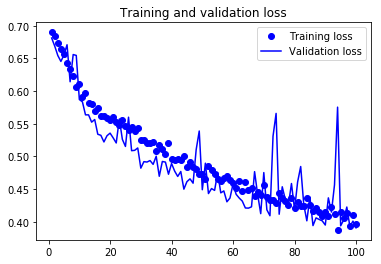

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
from keras.applications import VGG16

In [58]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 231s 4us/step


In [62]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = r'G:\pic_data\dogs_vs_cats\small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [63]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))


In [64]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6065 - acc: 0.6600 - val_loss: 0.4495 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4269 - acc: 0.8045 - val_loss: 0.3639 - val_acc: 0.8720
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3594 - acc: 0.8495 - val_loss: 0.3261 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3180 - acc: 0.8670 - val_loss: 0.2971 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2848 - acc: 0.8815 - val_loss: 0.2842 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2631 - acc: 0.8950 - val_loss: 0.2707 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2445 - acc: 0.9065 - val_loss: 0.2615 - val_acc: 0.9000
Epoch 8/30
200

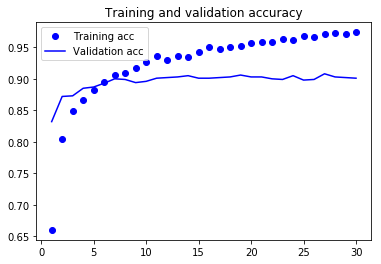

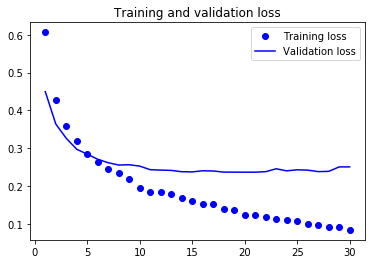

In [65]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
conv_base.trainable = False

In [70]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 114s 1s/step - loss: 0.6002 - acc: 0.6870 - val_loss: 0.4672 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.4942 - acc: 0.7795 - val_loss: 0.3945 - val_acc: 0.8350
Epoch 3/30
100/100 [==============================] - 113s 1s/step - loss: 0.4530 - acc: 0.7920 - val_loss: 0.3393 - val_acc: 0.8620
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.4270 - acc: 0.8095 - val_loss: 0.3250 - val_acc: 0.8640
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.3816 - acc: 0.8375 - val_loss: 0.3183 - val_acc: 0.8680
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.3880 - acc: 0.8360 - val_loss: 0.2883 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.3783 - acc: 0.8390 - val_loss: 0.2801 - v

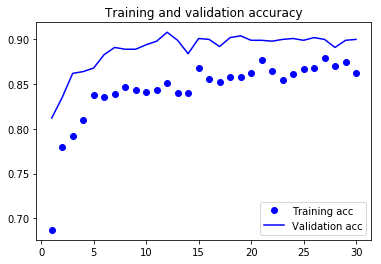

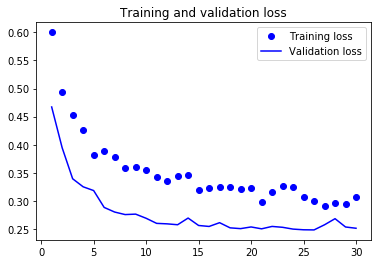

In [71]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [75]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 139s 1s/step - loss: 0.3137 - acc: 0.8600 - val_loss: 0.2304 - val_acc: 0.9100
Epoch 2/100
100/100 [==============================] - 138s 1s/step - loss: 0.2889 - acc: 0.8645 - val_loss: 0.2163 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 137s 1s/step - loss: 0.2530 - acc: 0.8990 - val_loss: 0.2083 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 137s 1s/step - loss: 0.2313 - acc: 0.9025 - val_loss: 0.2045 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 138s 1s/step - loss: 0.2313 - acc: 0.8940 - val_loss: 0.1964 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 137s 1s/step - loss: 0.2048 - acc: 0.9120 - val_loss: 0.1964 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 137s 1s/step - loss: 0.1836 - acc: 0.9200 - val_loss: 0.2024 - val_acc: 0.9270
Epoch 8/100
100/100 [==============================] - 138s 1s

KeyboardInterrupt: 

In [76]:
from keras.models import load_model

In [6]:
model = load_model('cats_and_dogs_small_2.h5')

NameError: name 'load_model' is not defined

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [1]:
img_path = r'img\184.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

img_tensor.shape

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

Using TensorFlow backend.


In [52]:
from keras import models
import keras

model = keras.applications.inception_v3.InceptionV3(weights="imagenet",include_top=False,input_shape=(150,150,3))
layer_outputs = [layer.output for layer in model.layers[1:18]]
activation_model = models.Model(inputs=model.inputs,outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

first_layer_activation.shape

(1, 74, 74, 32)

In [54]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

E:\anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


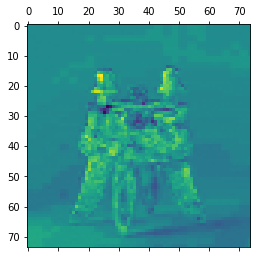

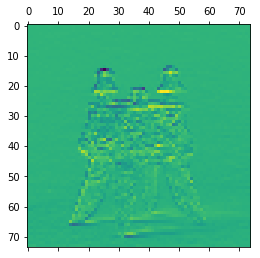

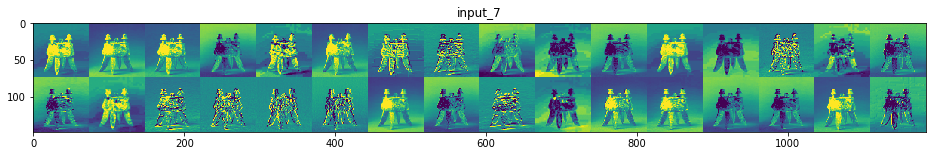

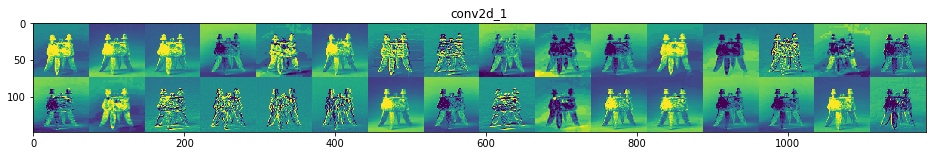

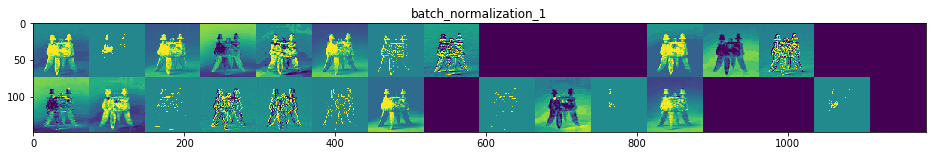

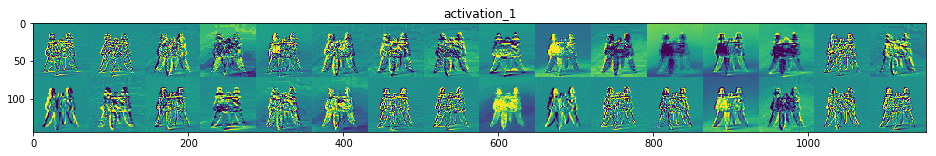

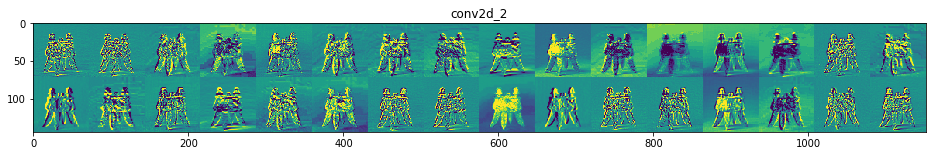

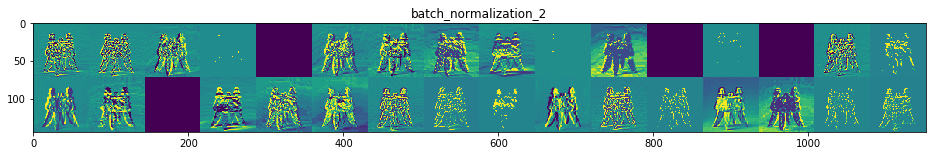

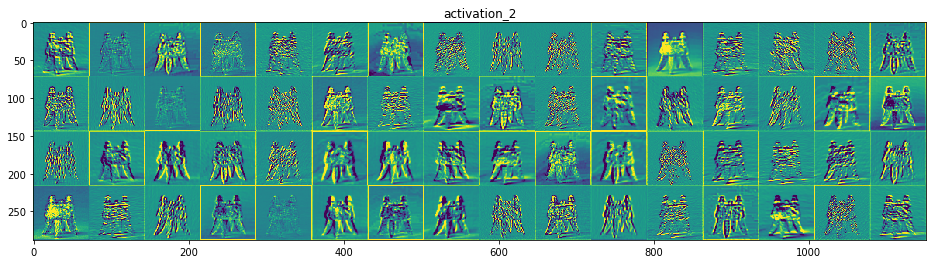

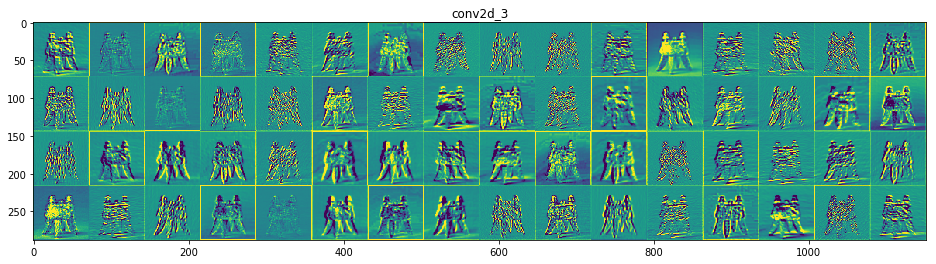

In [55]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,7],cmap='viridis')

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
img_per_row = 16

for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // img_per_row
    dispaly_grid = np.zeros((size * n_cols, img_per_row * size))
    
    for col in range(n_cols):
        for row in range(img_per_row):
            channel_img = layer_activation[0,:,:,col*img_per_row+row]
            channel_img -= channel_img.mean()
            channel_img /= channel_img.std()
            channel_img *= 64
            channel_img += 128
            channel_img = np.clip(channel_img,0,255).astype('uint8')
            dispaly_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_img
    
    scale = 1./size
    plt.figure(figsize=(scale*dispaly_grid.shape[1],
                       scale*dispaly_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(dispaly_grid,aspect='auto',cmap='viridis')

In [62]:
from keras.applications import VGG16,InceptionV3
from keras import backend as K
model = InceptionV3(weights='imagenet',include_top=False)
layer_name = 'conv2d_23'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])


grads = K.gradients(loss,model.input)[0]

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input],[loss,grads])
import numpy as np
loss_value,grads_value = iterate([np.zeros((1,150,150,3))])

input_img_data = np.random.random((1,150,150,3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value,grads_value = iterate([input_img_data])
    input_img_data += grads_value

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name,filter_index,size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss,model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    plt.show()
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

ValueError: No such layer: conv2d_23

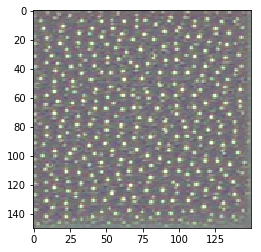

In [57]:
plt.imshow(generate_pattern('conv2d_23', 0))

In [58]:
def plot_filters(layer_name = 'block1_conv1'):
    size = 64
    margin = 5
    results = np.zeros((8*size+7*margin,8*size+7*margin,3),dtype='uint8')
    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name,i+(j*8),size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img
    plt.figure(figsize=(20, 20))
    plt.title(layer_name)
    plt.imshow(results)        

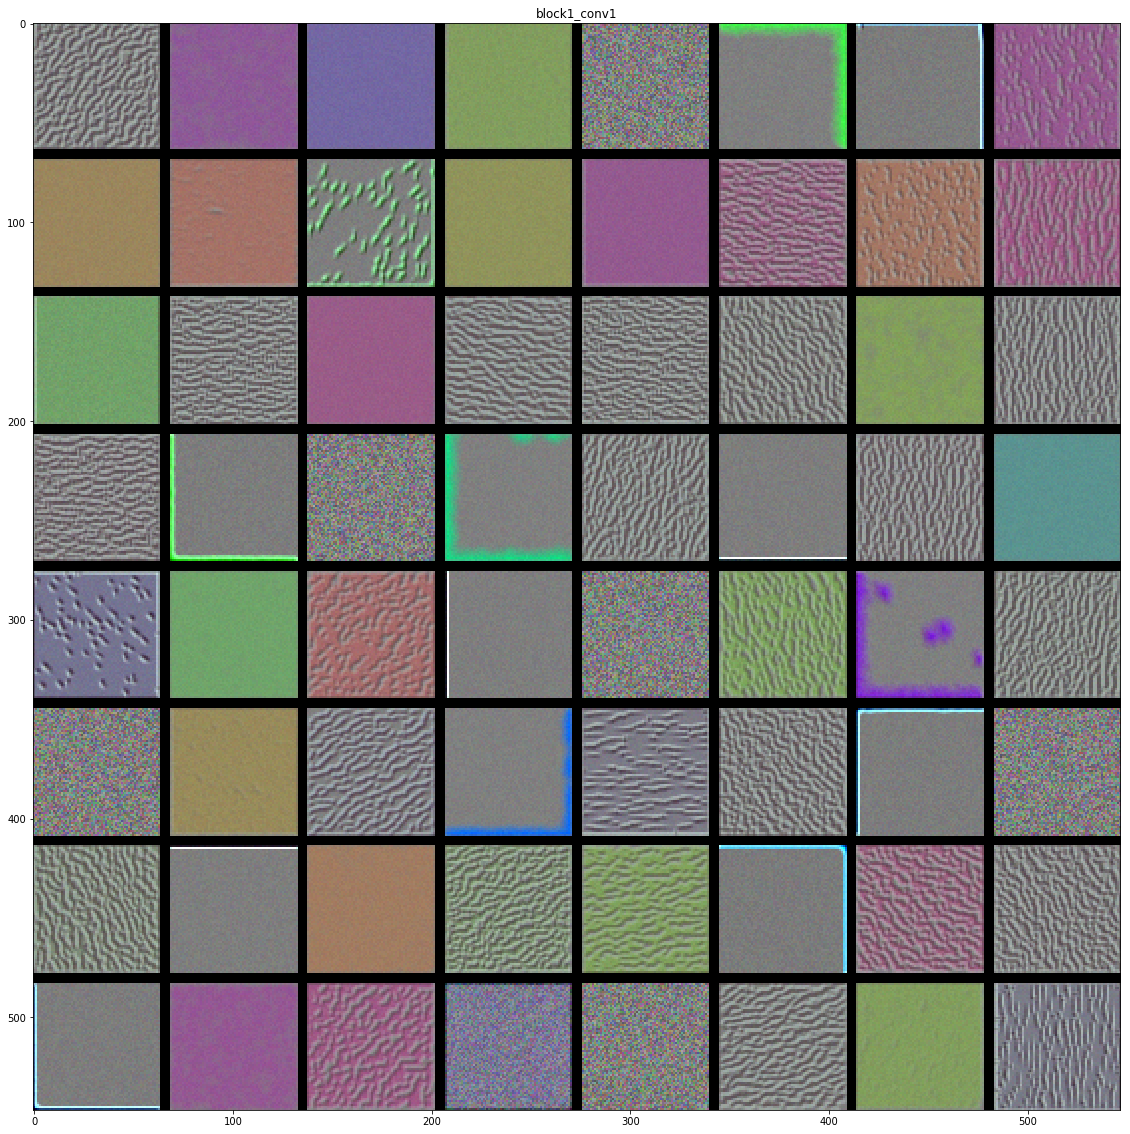

In [59]:
plot_filters()

In [60]:
plot_filters(layer_name = 'conv2d_23')

ValueError: No such layer: conv2d_23